## Calculating second order differential equation

#### Duffing Oscillator implementation: https://github.com/vkulkar/Duffing

#### The Duffing Equation:
    
<center>
    $\frac{d^2 y}{dt^2} + \beta \frac{dy}{dt} + y(t) + y^3(t) = A\cos(\Omega t)$
</center>

<br />$A = 22$<br />
<br />$\Omega = 5$<br />
<br />$\beta = 0.1$<br />

In [ ]:
# This code simulates the duffing oscillator:
# Damped driven harmonic oscillator in a double well potential.
# F = -gamma*dx/dt + 2*a*x - 4*b*x^3 + A*cos(omega*t)
# Second order nonlinear differential equation numerically solved by Taylor expansion.

# For the current set of parameters the motion is chaotic, i.e.
# the motion is strongly sensitive to the initial conditions. Additionally
# no fixed period of motion is observed. The poincare plot is a fractal.

import numpy as np
import matplotlib.pyplot as plt
import time
t1 = time.time() #times the computation

# parameters (mass = 1)
a = 0.5
b = 1/16.0
A = 2.5
omega = 2.0
gamma = 0.1
period = 2*np.pi/(1.0*omega)
h = period/32 # time step
# length of the simulation
# T = 100000
# t = np.linspace(0, 100000*period, 5500000)
# h = 100000*period/5500000
t = np.arange(0, 10000000*period, h)
# t = np.arange(0,T,h)

def x_2(x,v):
    '''
    second derivative term for Taylor series
    '''
    return -gamma*v + 2.0*a*x - 4.0*b*x*x*x

def x_3(x2,x,v):
    '''
    third derivative term for Taylor series
    '''
    return -gamma*x2 + 2.0*a*v -12.0*b*x*x*v

def x_4(x3,x2,x,v):
    '''
    fourth derivative term for Taylor series
    '''
    return -gamma*x3 + 2.0*a*x2 -12.0*b*x*x*x2 - 24.0*b*v*v*x

def x_5(x4,x3,x2,x,v):
    '''
    fifth derivative term for Taylor series
    '''
    return -gamma*x4 + 2*a*x3 -12.0*b*(x*x*x3 + 2.0*x2*x*v) -24.0*b*(v*v*v+2*x*v*x2)

# Trigonometric terms in derivatives. Evaluate before the loop
x2F = A*np.cos(omega*t)
x3F = -A*omega*np.sin(omega*t)
x4F = -A*omega*omega*np.cos(omega*t)
x5F = A*omega*omega*omega*np.sin(omega*t)

# coefficients in front of Taylor series expansion
# Evaluate before the loop
coef1 = 0.5*h**2.0
coef2 = 1.0/6.0*h**3.0
coef3 = 1.0/24.0*h**4.0
coef4 = 1.0/120.0*h**5.0

# initial conditions
v = 0.0
x = 0.5

position = np.zeros(len(t))
velocity = np.zeros(len(t))
position[0] = x

for i in range(1,len(t)):
    d2 = x_2(x,v) + x2F[i]
    d3 = x_3(d2,x,v) + x3F[i]
    d4 = x_4(d3,d2,x,v) + x4F[i]
    d5 = x_5(d4,d3,d2,x,v) + x5F[i]
    # Taylor series expansion for x,v. Order h^5
    x += v*h + coef1*d2 + coef2*d3 + coef3*d4 + coef4*d5
    v += d2*h + coef1*d3 + coef2*d4 + coef3*d5
    position[i] = x
    velocity[i] = v

##f = open('data_duffing_pos_vel.txt','w')
##for i in range(len(t)):
##    f.write('%f %f' %(position[i], velocity[i]))
##f.close()

# obtain phase space points at integer multiples of the period for Poincare plot
strange_attractor = np.zeros([len(t),2])
# strange_attractor = np.zeros([int(T/period),2])
k = 1
for i in range(len(t)):
    if abs(t[i]-k*period)<h:
        strange_attractor[k-1,0] = position[i]
        strange_attractor[k-1,1] = velocity[i]
#         print(k)
        k+=1

t2 = time.time()
print('computation takes ' + str(t2-t1) + ' seconds.')

plt.plot(t,position,'g-',linewidth=4.0)
# plt.axis([0, 100, -2, 2])
plt.title('Trajectory of the oscillator',{'fontsize':24})
plt.xlabel('time',{'fontsize':24})
plt.ylabel('Position',{'fontsize':24})
plt.tick_params(axis='both',labelsize=24)
plt.axis([0, 1000, -4, 4])
plt.show()

In [3]:
len(position)

320000

In [4]:
new_data = position[::80]

In [7]:
len(new_data)

8000

/home/sid/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


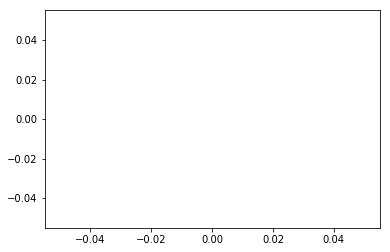

In [45]:
plt.plot(np.fft.fft(position))
# plt.xlim(-1, 2000000)
# plt.axis([0, 100000, -10000, 10000])
plt.show()

In [46]:
from math import ceil

x = position.copy()
# x = new_data.copy()
x.sort()

N = 4 # number of symbols

interval = []
interval.append(x[0])
for i in range(2, N+1):
    interval.append(x[ceil((i-1)*len(x)/N)])
interval.append(x[-1])

print(interval)

# interval_group = []
# for i, a in enumerate(interval[1:]):
#     interval_group.append([interval[i], a])
    
# print(interval_group)

[-3.5293064495066145e+94, nan, nan, nan, nan]


In [17]:
# import bisect
# import re

# paces = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 863]

# for p in paces:
#     quantized = []
#     for x in position[::p]:
#         new = bisect.bisect_right(interval, x) - 1
#         quantized.append(new)    # corrects index in 0
#     #     print(new)
#     # print(quantized[0:100])

#     seq = ''.join(str(i) for i in quantized)
#     # print(seq)
#     suma = 0
#     for match in re.finditer(r"(\w)\1", seq):
#         suma += 1

#     print(f'pace = {p}, repeated = {suma/len(quantized)}')

# # plt.plot(np.fft.fft(quantized))
# # plt.xlim(0, 10)

In [18]:
# repetitions = []
# last_i = quantized[0]
# counter = 0
# for i in quantized[::71]:
#     if i == last_i:
#         counter += 1
#     else:
#         repetitions.append((counter, last_i))
#         print(f'c = {counter}, i = {last_i}')
#         counter = 0
#     last_i = i

In [21]:
# char = []

# for i in range(0,8):
#     char.append([r for r in repetitions if r[1] == i])

In [40]:
import bisect
import yaml

quantized = []

for x in position:
# for x in new_data:
    new = bisect.bisect_right(interval[:-1], x) - 1
    quantized.append(new)    # corrects index in 0

seq = ''.join(str(i) for i in quantized)
seq_reduced = seq[::3]
print(len(seq_reduced))
# with open(f'../dcgram_files/duffing_equation/original/original_len_{len(seq_reduced)}.yaml', 'w') as f:
#     yaml.dump(seq_reduced, f)
# with open(f'../dcgram_files/duffing_equation/original/original_len_{len(seq)}.yaml', 'w') as f:
#     yaml.dump(seq, f)

566667


In [42]:
seq[0:1000]

'222222222222222223333333332211100000000111111111111111111111110000000011122223333333333333332222111000000001111111110000011111111000000001112222333333333333333332222111100000000000000000011112222233333333333333332221110000000011111111100000111111110000000011112222333333333333333322211100000000111111110000001111111110000000011111222222222223333333322211000000001111111111111111112221111111000000110000000000111222333333333222223333333222222222222223333322222333333333222111000000000111000000001111112222211111122222222333222333333333322211100000001111111111111111112222111111110001111000000000011122333333332222222222222222222222222333333322222222222222222211111111111221111110000000111110000000001112222233333333333333332221110000000011111111110000111111110000000011122233333333333333333332222111111111110000000001112233333332211100000000000000000011111112222111111111111111111000000001111222222222222333333332221110000000000000000001111222222223333333333333221110000000111222223333333333333222110

## Analyze conditional entropy of sequence

In [60]:
import sequenceanalyzer as sa

N = 10

s = seq
# s = seq_reduced
p, a = sa.calc_probs(s, N)
p_cond = sa.calc_cond_probs(p, a, N)

e = sa.calc_cond_entropy(p, p_cond, N)

Calculating probabilities for words with length 11 ...
Calculating probabilities for words with length 10 ...
Calculating probabilities for words with length 9 ...
Calculating probabilities for words with length 8 ...
Calculating probabilities for words with length 7 ...
Calculating probabilities for words with length 6 ...
Calculating probabilities for words with length 5 ...
Calculating probabilities for words with length 4 ...
Calculating probabilities for words with length 3 ...
Calculating probabilities for words with length 2 ...
Calculating subsequence conditional probabilities
L = 10
Calculating conditional probabilities of subsequences of length: 1
Calculating conditional probabilities of subsequences of length: 2
Calculating conditional probabilities of subsequences of length: 3
Calculating conditional probabilities of subsequences of length: 4
Calculating conditional probabilities of subsequences of length: 5
Calculating conditional probabilities of subsequences of length: 6

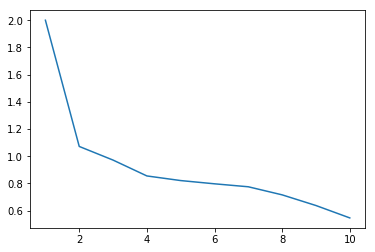

In [62]:
# e
plt.plot(list(range(1,N+1)), e)

## Analyze repetition of symbols in sequence

In [52]:
curr_c = seq[0]
repeated = 1
repeated_list = []

for c in seq[1:]:
    if c == curr_c:
        repeated += 1
    else:
        curr_c = c
        repeated_list.append(repeated)
        repeated = 1
        
# print(repeated_list)

In [54]:
repeated_list = np.array(repeated_list)
print(repeated_list.max())
print(repeated_list.mean())
# print(np.where(repeated_list == 3))

14
3.2313815778844135


In [87]:
sequences = seq[::12]

curr_c = sequences[0]
repeated = 1
repeated_list = []

for c in sequences[1:]:
    if c == curr_c:
        repeated += 1
    else:
        curr_c = c
        repeated_list.append(repeated)
        repeated = 1
repeated_list = np.array(repeated_list)

In [89]:
repeated_list.mean()

1.4341956650352283